# <u> Task 02: </u>

# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
# Let's import necessary libraries
import pandas as pd
import os
os.environ["MKL_NUM_THREADS"] = "1" # To clear a warning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Dataset : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
# Let's load the CSV file into a dataframe
df = pd.read_csv("Mall_Customers.csv")

In [3]:
# Look for missing values in the dataframe
print(f"\nNull count :-\n{df.isna().sum()}")


Null count :-
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### No NA values detected, so we can skip the data cleaning

In [4]:
# Now, let's scale the values in the dataframe
scaler = MinMaxScaler()
scaler.fit(df[['Age', 'Spending Score (1-100)']])
df[['Age', 'Spending Score (1-100)']] = scaler.transform(df[['Age', 'Spending Score (1-100)']])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,15,0.387755
1,2,Male,0.057692,15,0.816327
2,3,Female,0.038462,16,0.051020
3,4,Female,0.096154,16,0.775510
4,5,Female,0.250000,17,0.397959
...,...,...,...,...,...
195,196,Female,0.326923,120,0.795918
196,197,Female,0.519231,126,0.275510
197,198,Male,0.269231,126,0.744898
198,199,Male,0.269231,137,0.173469


# Using Elbow Plot Method
### Let's use elbow plot method to determine the K value for our data

In [5]:
# Let's check SSE(Sum of Square Errors) for each value of K
sse = []
for k in range(1, 11):
    check_k = KMeans(n_clusters=k, n_init='auto')
    check_k.fit(df[['Age', 'Spending Score (1-100)']])
    # inertia_ is a parameter that gives the value of SSE calculated
    sse.append(check_k.inertia_)

# SSE values calculated the range of K
sse

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[28.17833784431536,
 13.337690580804235,
 8.881021059496405,
 6.486113890098963,
 5.75998229884694,
 3.7659319388103047,
 3.2800569099926897,
 2.9029649738682224,
 2.4725278375694315,
 2.1140632319600074]

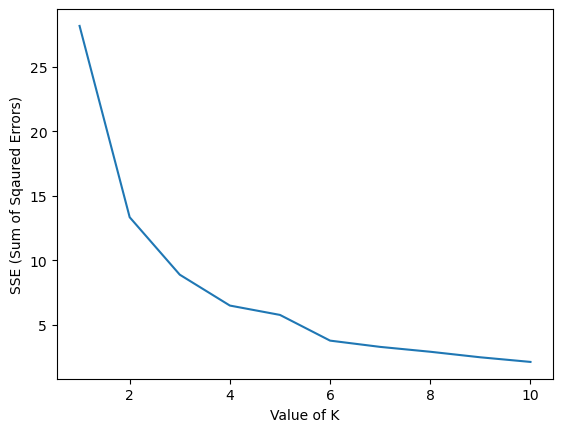

In [6]:
# Now, let's plot SSE values in a chart
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')
plt.plot(range(1, 11), sse)

### Let's take K=4, since it the plot gradually decreases from that point

In [7]:
# Now let's apply the KMeans algorithm
km = KMeans(n_clusters=4, n_init='auto')
y_pred = km.fit_predict(df[['Age', 'Spending Score (1-100)']])
y_pred

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0,
       3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0,
       0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [8]:
# The centroids of the 4 clusters
print(f"\nCentroids : {km.cluster_centers_}")
df['cluster'] = y_pred
df


Centroids : [[0.19599018 0.70440729]
 [0.9029304  0.48104956]
 [0.56376518 0.45408163]
 [0.45499182 0.14546244]]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,15,0.387755,0
1,2,Male,0.057692,15,0.816327,0
2,3,Female,0.038462,16,0.051020,3
3,4,Female,0.096154,16,0.775510,0
4,5,Female,0.250000,17,0.397959,0
...,...,...,...,...,...,...
195,196,Female,0.326923,120,0.795918,0
196,197,Female,0.519231,126,0.275510,3
197,198,Male,0.269231,126,0.744898,0
198,199,Male,0.269231,137,0.173469,3


## Plot the clustering result in Scatterplot

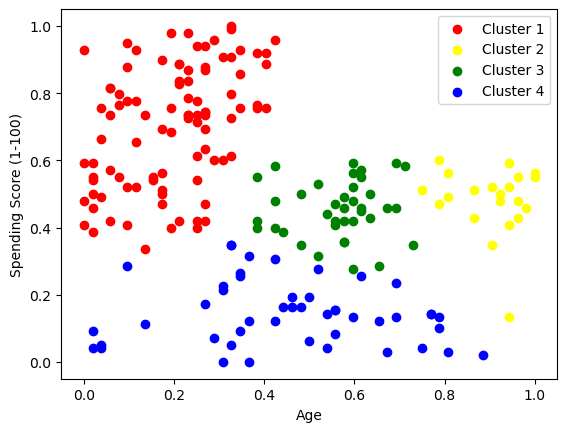

In [9]:
# Grouping clusters based on their centroids and predictions
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]

# Apply different colors to groups to differentiate each group
plt.scatter(df1['Age'], df1['Spending Score (1-100)'], color='red', label='Cluster 1')
plt.scatter(df2['Age'], df2['Spending Score (1-100)'], color='yellow', label='Cluster 2')
plt.scatter(df3['Age'], df3['Spending Score (1-100)'], color='green', label='Cluster 3')
plt.scatter(df4['Age'], df4['Spending Score (1-100)'], color='blue', label='Cluster 4')

# Plot the values
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [10]:
# Add new features
df['Age_Score'] = df['Age'] * df['Spending Score (1-100)']
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 25, 50, 75, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df['Spending_Score_Category'] = pd.cut(df['Spending Score (1-100)'], bins=[0, 25, 50, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])





In [11]:
# Scale the new features
scaler.fit(df[['Age_Score']])
df[['Age_Score']] = scaler.transform(df[['Age_Score']])


In [12]:
# Check the SSE for each value of K with the new features
sse_new = []
for k in range(1, 11):
    check_k = KMeans(n_clusters=k, n_init='auto')
    check_k.fit(df[['Age', 'Spending Score (1-100)', 'Age_Score']])
    sse_new.append(check_k.inertia_)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

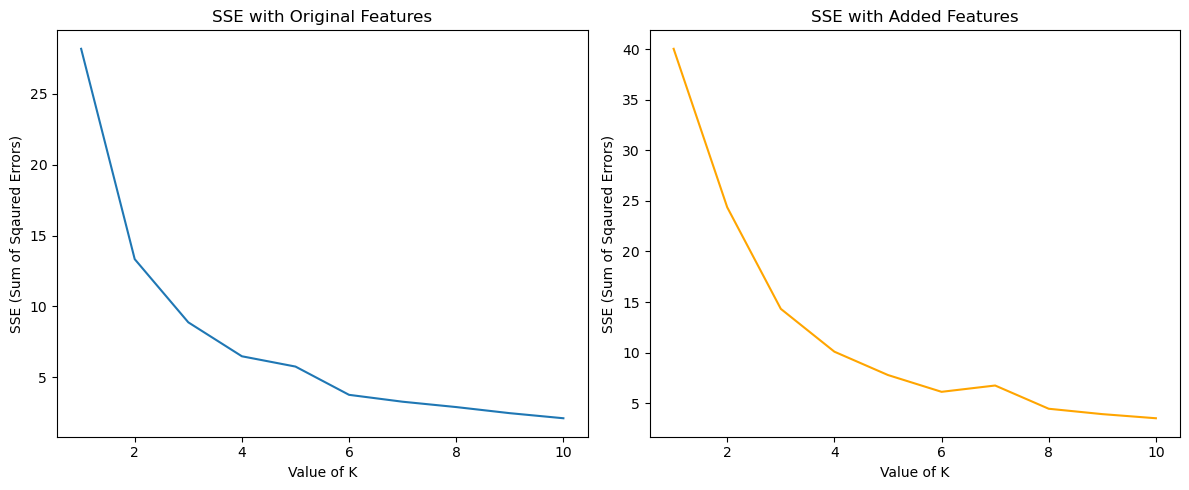

In [13]:
# Plot the SSE values with the new features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), sse)
plt.title('SSE with Original Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), sse_new, color='orange')
plt.title('SSE with Added Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')

plt.tight_layout()
plt.show()


In [14]:
import math
df['Income'] = df['Annual Income (k$)'] * df['Spending Score (1-100)']
df['Age_Income_Ratio'] = df['Age'] / df['Annual Income (k$)']
df['Age_Squared'] = df['Age'] ** 2
df['Spending_Score_Squared'] = df['Spending Score (1-100)'] ** 2
df['Age_Log'] = df['Age'].apply(lambda x: 0 if x == 0 else math.log(x))

In [15]:
# Scale the new features
scaler.fit(df[['Income', 'Age_Income_Ratio', 'Age_Squared', 'Spending_Score_Squared', 'Age_Log']])
df[['Income', 'Age_Income_Ratio', 'Age_Squared', 'Spending_Score_Squared', 'Age_Log']] = scaler.transform(df[['Income', 'Age_Income_Ratio', 'Age_Squared', 'Spending_Score_Squared', 'Age_Log']])


In [16]:
# Check the SSE for each value of K with the additional features
sse_advanced = []
for k in range(1, 11):
    check_k = KMeans(n_clusters=k, n_init='auto')
    check_k.fit(df[['Age', 'Spending Score (1-100)', 'Age_Score', 'Income', 'Age_Income_Ratio', 'Age_Squared', 'Spending_Score_Squared', 'Age_Log']])
    sse_advanced.append(check_k.inertia_)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

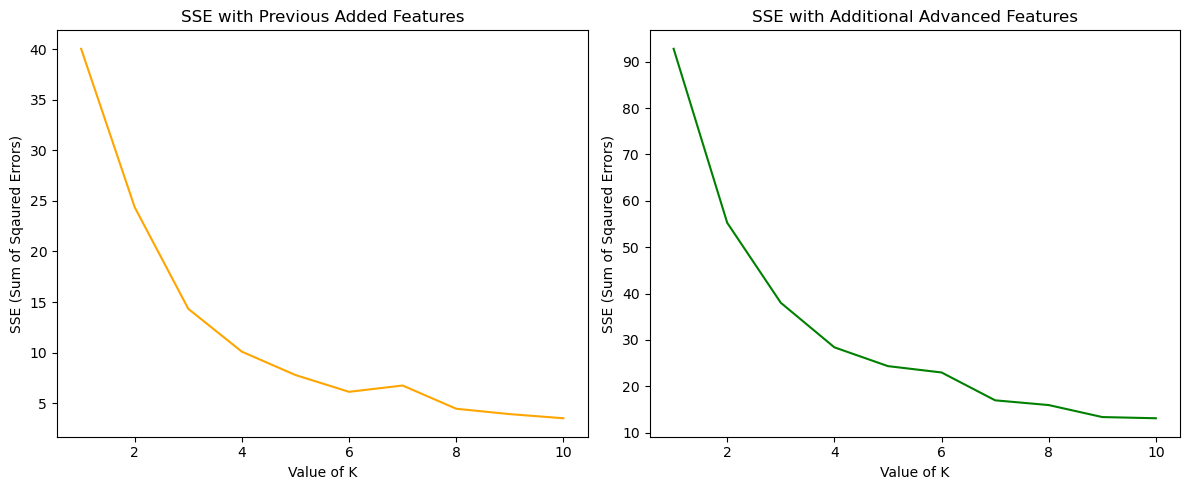

In [17]:
# Plot the SSE values with the additional features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), sse_new, color='orange')
plt.title('SSE with Previous Added Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), sse_advanced, color='green')
plt.title('SSE with Additional Advanced Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')

plt.tight_layout()
plt.show()


In [18]:
#Now  I am Adding features representing combination and distance
import numpy as np
df['Age_Score'] = df['Age'] * df['Spending Score (1-100)']
df['Distance_From_Center'] = np.sqrt((df['Age'] - km.cluster_centers_[df['cluster'], 0]) ** 2 + 
                                     (df['Spending Score (1-100)'] - km.cluster_centers_[df['cluster'], 1]) ** 2)

In [19]:
# Scale the new features
scaler.fit(df[['Age_Score', 'Distance_From_Center']])
df[['Age_Score', 'Distance_From_Center']] = scaler.transform(df[['Age_Score', 'Distance_From_Center']])


In [20]:
# Check the SSE for each value of K with the additional features
sse_innovative = []
for k in range(1, 11):
    check_k = KMeans(n_clusters=k, n_init='auto')
    check_k.fit(df[['Age', 'Spending Score (1-100)', 'Age_Score', 'Distance_From_Center']])
    sse_innovative.append(check_k.inertia_)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

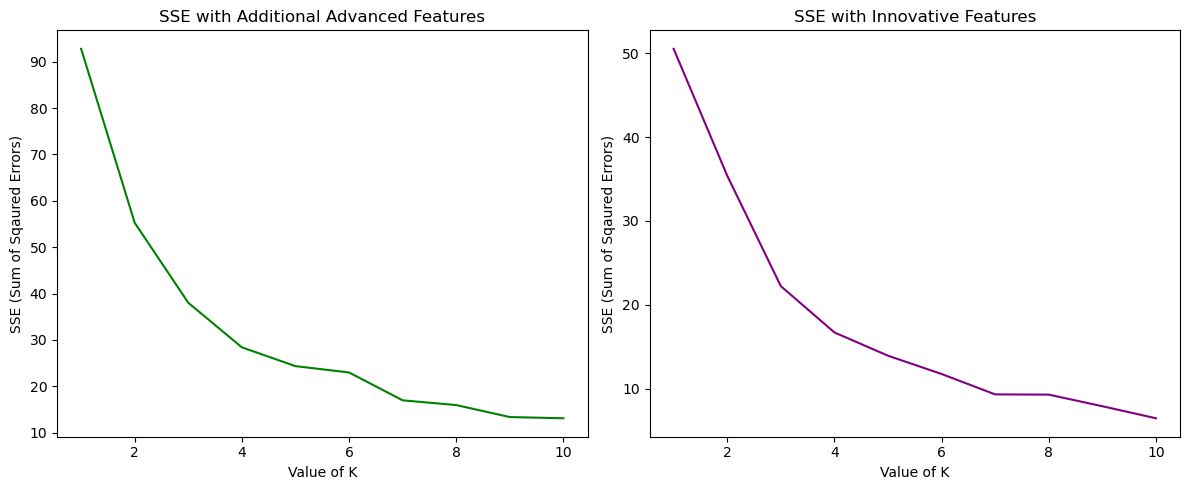

In [21]:
# Plot the SSE values with the innovative features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), sse_advanced, color='green')
plt.title('SSE with Additional Advanced Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), sse_innovative, color='purple')
plt.title('SSE with Innovative Features')
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')

plt.tight_layout()
plt.show()
